In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
classes=["airoplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [32]:
def plot_sample(X,y,index):
    plt.figure(figsize=(4,1))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])
    plt.show()

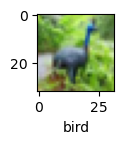

In [8]:
plot_sample(X_train,y_train,6)

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    #keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

C:\Users\mukth\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 78ms/step - accuracy: 0.2790 - loss: 2.4230
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.3922 - loss: 1.6963
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.4256 - loss: 1.6013
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 0.4435 - loss: 1.5598
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.4581 - loss: 1.5287


In [12]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4629 - loss: 1.5123


[1.5154588222503662, 0.4632999897003174]

In [14]:
from sklearn.metrics import classification_report, confusion_matrix 
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]
print("Classification report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.50      0.51      0.51      1000
           1       0.53      0.65      0.59      1000
           2       0.44      0.13      0.20      1000
           3       0.33      0.24      0.28      1000
           4       0.36      0.48      0.41      1000
           5       0.40      0.37      0.38      1000
           6       0.43      0.62      0.51      1000
           7       0.62      0.41      0.50      1000
           8       0.53      0.69      0.60      1000
           9       0.50      0.53      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.46      0.46      0.45     10000



In [18]:
cnn=models.Sequential([
    #CNN
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
 #It will figure out the filters
    
    #Dense
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

C:\Users\mukth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.3838 - loss: 1.6912
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5961 - loss: 1.1552
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6529 - loss: 1.0075
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6883 - loss: 0.9057
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7114 - loss: 0.8314


In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6696 - loss: 0.9625


[0.9762579202651978, 0.6635000109672546]

In [22]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]
print("Classification report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.75      0.68      1000
           1       0.86      0.69      0.77      1000
           2       0.46      0.70      0.55      1000
           3       0.49      0.53      0.51      1000
           4       0.65      0.58      0.61      1000
           5       0.70      0.45      0.55      1000
           6       0.84      0.68      0.75      1000
           7       0.78      0.71      0.75      1000
           8       0.68      0.87      0.77      1000
           9       0.81      0.67      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.69      0.66      0.67     10000
weighted avg       0.69      0.66      0.67     10000



In [23]:
y_test=y_test.reshape(-1,)

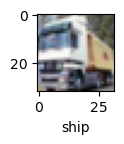

In [28]:
plot_sample(X_test,y_test,1)

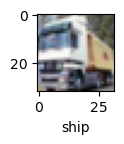

In [30]:
plot_sample(X_test,y_pred_classes,1)